## 1. Imporiting important libaries

In [11]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.utils import plot_model, image_dataset_from_directory
import numpy as np
import os
from sklearn.model_selection import train_test_split
import shutil
import keras
import matplotlib.pyplot as plt

## 2. Spliting the data into train and test files

### 2.1 First creating two directories: Train and Test

In [3]:
src = r"C:\Users\rezaa\spyder\Convolutional-Neural-Network-Image-Processor\Animals"
dst = r"C:\Users\rezaa\spyder\Convolutional-Neural-Network-Image-Processor\data"

final_dir = ['train', 'test']
final_dir = [os.path.join(dst,final) for final in final_dir]
final_dir

['C:\\Users\\rezaa\\spyder\\Convolutional-Neural-Network-Image-Processor\\data\\train',
 'C:\\Users\\rezaa\\spyder\\Convolutional-Neural-Network-Image-Processor\\data\\test']

### 2.2 Creating the directories

In [4]:

all_dir = os.listdir(src)
os.mkdir(dst)

for final in final_dir:
    os.mkdir(final)
    for each_dir in all_dir:
        path2 = os.path.join(final, each_dir)
        os.mkdir(path2)

### 2.3 Copying the files from parent directory, spliting it into train and test (80:20) and then copying in the above created files

In [5]:

for each_dir in all_dir:
    path3 = os.path.join(src,each_dir)
    list_of_items = os.listdir(path3)
    x_train, x_test = train_test_split(list_of_items, random_state=0, test_size=0.2)
    paste = True
    for final in final_dir:
        path4 = os.path.join(final,each_dir)
        if paste:
            for item in x_train:
                item_src_path = os.path.join(path3,item)
                shutil.copy(item_src_path, path4)

            paste = False
        else:
            for item in x_test:
                item_scr_path = os.path.join(path3,item)
                shutil.copy(item_scr_path, path4)


## 3. Since the amount of data is less we are using Imagegenerator to create additional data

In [6]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_ds = train_datagen.flow_from_directory(
    r'C:\Users\rezaa\Desktop\x\train',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical')

test_ds = test_datagen.flow_from_directory(
    r'C:\Users\rezaa\Desktop\x\test',
    target_size=(200, 200),
    batch_size=32,
    class_mode='categorical')

Found 2400 images belonging to 3 classes.
Found 600 images belonging to 3 classes.


## 4. Model Formation: The CNN model has 3 convolution layers and 2 fully connected layer

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), padding='valid',activation='relu', input_shape=(200,200,3)))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Conv2D(32, kernel_size = (3,3), padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))


model.add(Conv2D(32,kernel_size = (3,3), padding='valid', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 23, 23, 32)       0

## 5. Model training and validation

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
history = model.fit(train_ds, epochs=25, validation_data=test_ds) 

Epoch 1/25
75/75 [==============================] - 23s 256ms/step - loss: 1.0212 - accuracy: 0.4675 - val_loss: 0.9040 - val_accuracy: 0.5583
Epoch 2/25
75/75 [==============================] - 20s 262ms/step - loss: 0.8010 - accuracy: 0.6263 - val_loss: 0.8906 - val_accuracy: 0.6100
Epoch 3/25
75/75 [==============================] - 20s 260ms/step - loss: 0.7560 - accuracy: 0.6429 - val_loss: 1.0552 - val_accuracy: 0.5367
Epoch 4/25
75/75 [==============================] - 20s 264ms/step - loss: 0.7280 - accuracy: 0.6554 - val_loss: 0.6794 - val_accuracy: 0.7033
Epoch 5/25
75/75 [==============================] - 20s 260ms/step - loss: 0.6767 - accuracy: 0.6904 - val_loss: 1.0380 - val_accuracy: 0.6217
Epoch 6/25
75/75 [==============================] - 20s 267ms/step - loss: 0.6205 - accuracy: 0.7271 - val_loss: 0.7934 - val_accuracy: 0.6783
Epoch 7/25
75/75 [==============================] - 20s 263ms/step - loss: 0.5910 - accuracy: 0.7454 - val_loss: 0.6678 - val_accuracy: 0.7217

## 6. Plotting the training data

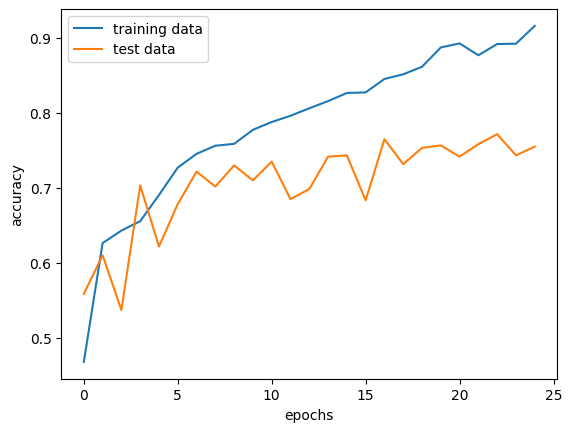

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training data','test data'])

## 7. Saving the model

In [19]:
model.save('./model/cnn_model.h5')

In [1]:
import tensorflow as tf